# Making sense of missense: a constraint and structural profiling of nonsynonymous variants associated with complex traits

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
import itertools
from statsmodels.stats.multitest import multipletests

In [ ]:
final_df = pd.read_csv('/content/phenotype_mapped_ccrs_3d.csv')

In [ ]:
final_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Variant ID,Gene,CSQ,HGVSc,HGVSp,P-Value,Beta,...,Protein names,Gene Names,Organism,Length,index,chain,residue,AA,SS,ACC
0,0,0,174,20-35384111-C-T,NaN,missense_variant,ENST00000374385.10:c.152G>A,ENSP00000363506.5:p.Arg51Gln,3.819382e-292,-0.056089,...,Ubiquinol-cytochrome c reductase complex assem...,UQCC1 BZFB C20orf44 UQCC,Homo sapiens (Human),299.0,0,A,51,R,-,247
1,1,1,1535,15-83819884-A-G,NaN,missense_variant,ENST00000286744.10:c.437A>G,ENSP00000286744.5:p.His146Arg,1.634408e-81,0.028604,...,ADAMTS-like protein 3 (ADAMTSL-3) (Punctin-2),ADAMTSL3 KIAA1233,Homo sapiens (Human),1691.0,0,A,146,H,B,124
2,2,2,4475,15-83970598-C-T,NaN,missense_variant,ENST00000286744.10:c.2605C>T,ENSP00000286744.5:p.Leu869Phe,2.383954e-30,-0.019322,...,ADAMTS-like protein 3 (ADAMTSL-3) (Punctin-2),ADAMTSL3 KIAA1233,Homo sapiens (Human),1691.0,0,A,869,L,P,76
3,3,3,5260,15-83870867-C-G,NaN,missense_variant,ENST00000286744.10:c.868C>G,ENSP00000286744.5:p.Leu290Val,1.630227e-12,0.012924,...,ADAMTS-like protein 3 (ADAMTSL-3) (Punctin-2),ADAMTSL3 KIAA1233,Homo sapiens (Human),1691.0,0,A,290,L,E,116
4,4,4,8910,4-17828367-G-C,NaN,missense_variant,ENST00000251496.7:c.1743G>C,ENSP00000251496.2:p.Met581Ile,8.897625e-128,-0.053613,...,Condensin complex subunit 3 (Chromosome-associ...,NCAPG CAPG NYMEL3,Homo sapiens (Human),1015.0,0,A,581,M,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2001,2013,4399,1-169542517-T-C,NaN,missense_variant,ENST00000367797.9:c.2573A>G,ENSP00000356771.3:p.Lys858Arg,2.724555e-15,-0.107570,...,Coagulation factor V (Activated protein C cofa...,F5,Homo sapiens (Human),2224.0,0,A,858,K,-,129
2002,2002,2014,6656,9-133405414-T-G,NaN,missense_variant,ENST00000371957.4:c.2036T>G,ENSP00000361025.3:p.Leu679Arg,8.453000e-37,0.259793,...,Serine/threonine kinase-like domain-containing...,STKLD1 C9orf96 SGK071,Homo sapiens (Human),680.0,0,A,679,L,-,131
2003,2003,2015,7305,11-46311035-A-T,NaN,missense_variant,ENST00000621158.5:c.599A>T,ENSP00000481956.1:p.Asp200Val,3.133428e-18,0.643384,...,Cyclic AMP-responsive element-binding protein ...,CREB3L1 OASIS PSEC0238,Homo sapiens (Human),519.0,0,A,200,D,-,157
2004,2004,2016,7638,4-186236880-G-A,NaN,missense_variant,ENST00000264690.11:c.428G>A,ENSP00000264690.6:p.Ser143Asn,9.022274e-16,0.097466,...,Plasma kallikrein (EC 3.4.21.34) (Fletcher fac...,KLKB1 KLK3,Homo sapiens (Human),638.0,0,A,143,S,T,39


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   2006 non-null   int64  
 1   Unnamed: 0.1   2006 non-null   int64  
 2   Unnamed: 0     2006 non-null   int64  
 3   Variant ID     2006 non-null   object 
 4   Gene           0 non-null      float64
 5   CSQ            2006 non-null   object 
 6   HGVSc          2006 non-null   object 
 7   HGVSp          2006 non-null   object 
 8   P-Value        2006 non-null   float64
 9   Beta           2006 non-null   float64
 10  AC NFE         2006 non-null   int64  
 11  AN NFE         2006 non-null   int64  
 12  AF NFE         2006 non-null   float64
 13  Unnamed: 10    0 non-null      float64
 14  ensp           2006 non-null   object 
 15  symbol         2006 non-null   object 
 16  Ensembl_prot   2006 non-null   object 
 17  HGNC_ID        2006 non-null   object 
 18  genomic_

In [ ]:
# ASA normalization constants were taken from:
# M. Z. Tien, A. G. Meyer, D. K. Sydykova, S. J. Spielman, C. O. Wilke (2013).
# Maximum allowed solvent accessibilities of residues in proteins. PLOS ONE
# 8:e80635.

final_df = final_df.drop(["Unnamed: 0.2", "Unnamed: 0.1",	"Unnamed: 0", "Unnamed: 10", "Gene"], axis=1)
print(final_df)
to_replace = ["oor"]

final_df = final_df.replace(to_replace, np.nan)
final_df = final_df.dropna()

final_df["ACC"] = final_df["ACC"].apply(lambda x: int(x))

RES_MAX_ACC = {'A': 129.0, 'R': 274.0, 'N': 195.0, 'D': 193.0, \
               'C': 167.0, 'Q': 225.0, 'E': 223.0, 'G': 104.0, \
               'H': 224.0, 'I': 197.0, 'L': 201.0, 'K': 236.0, \
               'M': 224.0, 'F': 240.0, 'P': 159.0, 'S': 155.0, \
               'T': 172.0, 'W': 285.0, 'Y': 263.0, 'V': 174.0}

SS_MAP = {"H": "H",
"B": "B",
 "E":"B",
 "G":"H",
 "I":"H",
 "P":"H",
 "T":"C",
 "S": "B",
 "-": "C"}

           Variant ID               CSQ                         HGVSc  \
0     20-35384111-C-T  missense_variant   ENST00000374385.10:c.152G>A   
1     15-83819884-A-G  missense_variant   ENST00000286744.10:c.437A>G   
2     15-83970598-C-T  missense_variant  ENST00000286744.10:c.2605C>T   
3     15-83870867-C-G  missense_variant   ENST00000286744.10:c.868C>G   
4      4-17828367-G-C  missense_variant   ENST00000251496.7:c.1743G>C   
...               ...               ...                           ...   
2001  1-169542517-T-C  missense_variant   ENST00000367797.9:c.2573A>G   
2002  9-133405414-T-G  missense_variant   ENST00000371957.4:c.2036T>G   
2003  11-46311035-A-T  missense_variant    ENST00000621158.5:c.599A>T   
2004  4-186236880-G-A  missense_variant   ENST00000264690.11:c.428G>A   
2005  4-186199057-C-A  missense_variant    ENST00000378802.5:c.775C>A   

                              HGVSp        P-Value      Beta  AC NFE  AN NFE  \
0      ENSP00000363506.5:p.Arg51Gln  3.8193

In [ ]:
final_df["max_acc"] = final_df["AA"].map(RES_MAX_ACC)

final_df["rsa"] = final_df["ACC"] / final_df["max_acc"]

final_df["ss_3class"] = final_df["SS"].map(SS_MAP)

final_df["burial_status"] = np.where(final_df["rsa"] > 0.25, "Exposed", "Buried")

In [ ]:

condlist = [final_df["AF NFE"] > 0.05, (final_df["AF NFE"] >= 0.01) & (final_df["AF NFE"] <= 0.05), final_df["AF NFE"] < 0.01]
choicelist = ["commom", "low frequency", "rare"]
final_df["frequency_class"] = np.select(condlist, choicelist, default="unknown")

In [ ]:
# Trait stats
trait_stats = final_df.groupby('trait')['weighted_pct'].agg(['mean', 'median', 'std', 'count'])

print(trait_stats)

                              mean     median        std  count
trait                                                          
BMI                      25.664716  17.450056  23.990336     77
Eosinophill count        24.151948  16.534761  23.417674    235
HCadjBMI custom          23.483613  16.460047  22.586628    194
HDL cholesterol          24.056329  13.648033  23.610937    222
IBD                      37.538616  35.668544  32.555806      4
LDL direct               20.668897  12.028286  22.077266    108
Lipoprotein A            21.895274  12.218090  21.652350     47
Mean corpuscular volume  22.743745  14.297122  22.616110    316
T2D custom               39.022393  28.358060  31.975547      7
asthma                   21.268805  12.998945  22.059601     31
breast cancer             6.714732   6.714732   7.782923      2
glucose                  23.950101  13.589358  25.526266     28
height                   24.531083  16.583287  23.457338    633
venous thromboembolism   20.168664  15.2

In [ ]:
# Overall statistics
final_df['weighted_pct'].agg(['mean', 'median', 'std', 'count'])

,weighted_pct
mean,23.776138
median,14.895918
std,23.179748
count,1910.000000


<Axes: xlabel='trait', ylabel='weighted_pct'>

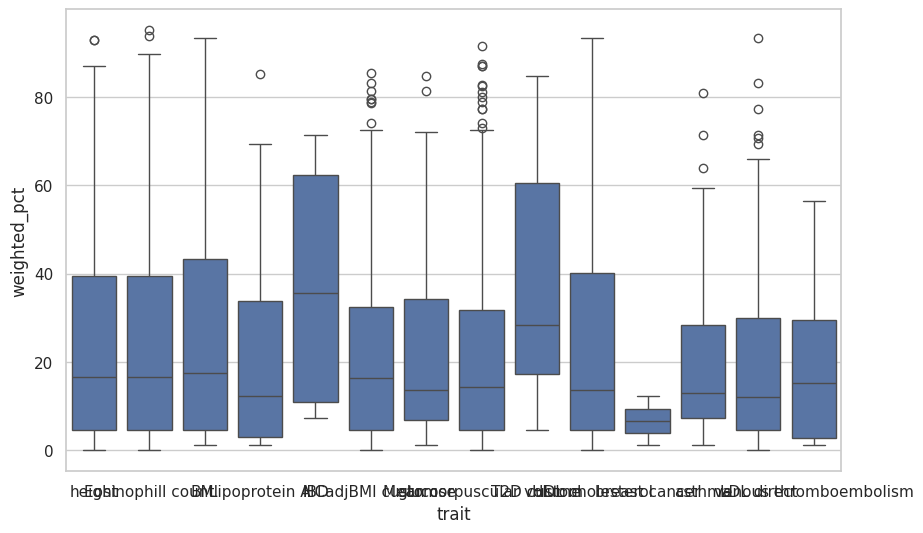

In [ ]:
sns.set_theme(style="whitegrid")

# Looking a CCRspct distribution in a graphical way
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=final_df,
    x='trait',
    y='weighted_pct'
)

<Axes: xlabel='AF NFE', ylabel='weighted_pct'>

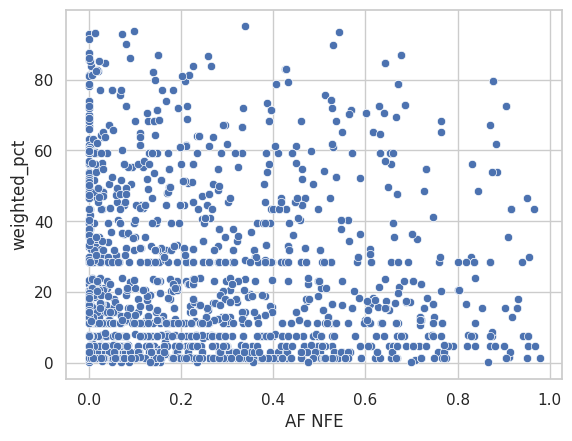

In [ ]:
# AF x CCRspct
sns.scatterplot(data=final_df, x='AF NFE', y='weighted_pct')

<Axes: xlabel='AF NFE', ylabel='weighted_pct'>

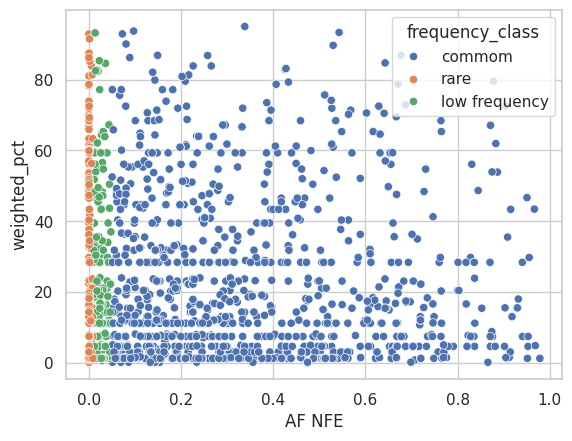

In [ ]:
# AF x CCRspct (by frequency)
sns.scatterplot(data=final_df, x='AF NFE', y='weighted_pct', hue="frequency_class")

In [ ]:
final_df["frequency_class"].value_counts() / len(final_df)

,count
frequency_class,
commom,0.767539
rare,0.117801
low frequency,0.114660


<Axes: xlabel='AF NFE', ylabel='weighted_pct'>

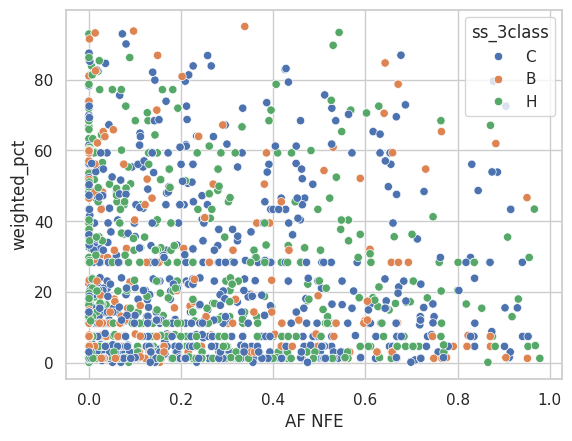

In [ ]:
# AF x CCRspct (strata: secondary structure)
sns.scatterplot(data=final_df, x='AF NFE', y='weighted_pct', hue="ss_3class")

<Axes: xlabel='AF NFE', ylabel='weighted_pct'>

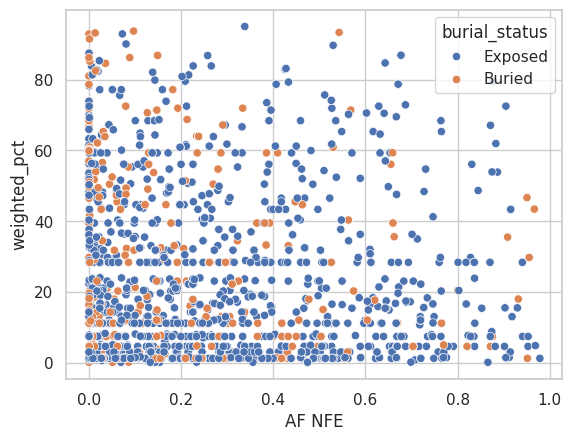

In [ ]:
# AF x CCRspct (strata: burial status)
sns.scatterplot(data=final_df, x='AF NFE', y='weighted_pct', hue="burial_status")

<Axes: xlabel='ss_3class', ylabel='weighted_pct'>

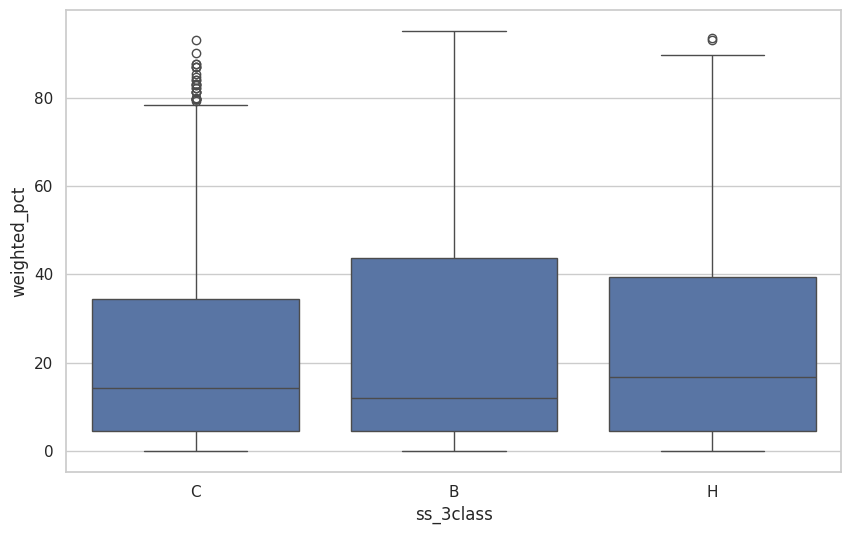

In [ ]:
# CCRspct by secondary structure
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=final_df,
    x='ss_3class',
    y='weighted_pct'
)

In [ ]:
groups = [group['weighted_pct'].values for name, group in final_df.groupby('ss_3class')]
f_stat, p_val = stats.f_oneway(*groups)


print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_val:.4f}")

F-statistic: 1.79
p-value: 0.1665


<Axes: xlabel='burial_status', ylabel='weighted_pct'>

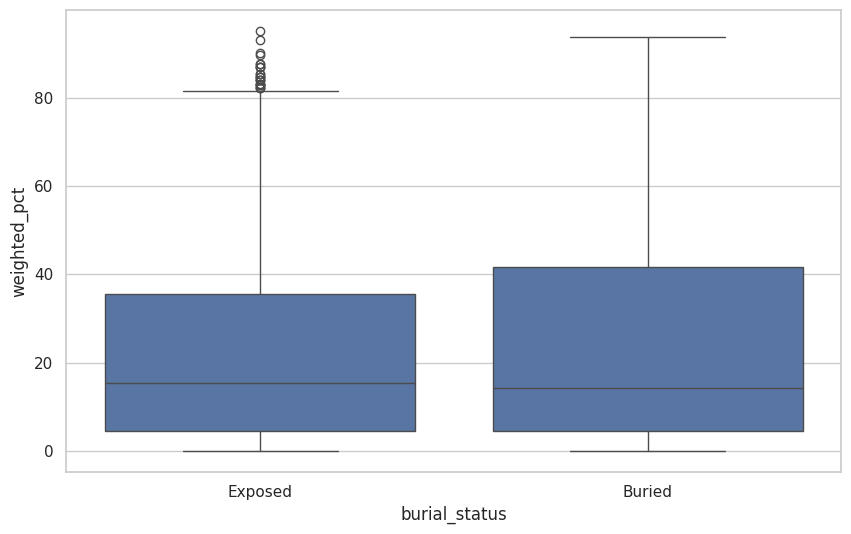

In [ ]:
# CCRspct by secondary burial status
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=final_df,
    x='burial_status',
    y='weighted_pct'
)

In [ ]:
# t-test
g1 = final_df[final_df['burial_status'] == 'Exposed']['weighted_pct']
g2 = final_df[final_df['burial_status'] == 'Buried']['weighted_pct']
t, p = ttest_ind(g1, g2)


print(f"t-statistic: {t:.2f}")
print(f"p-value: {p:.4f}")



t-statistic: -1.46
p-value: 0.1447


<Axes: xlabel='frequency_class', ylabel='weighted_pct'>

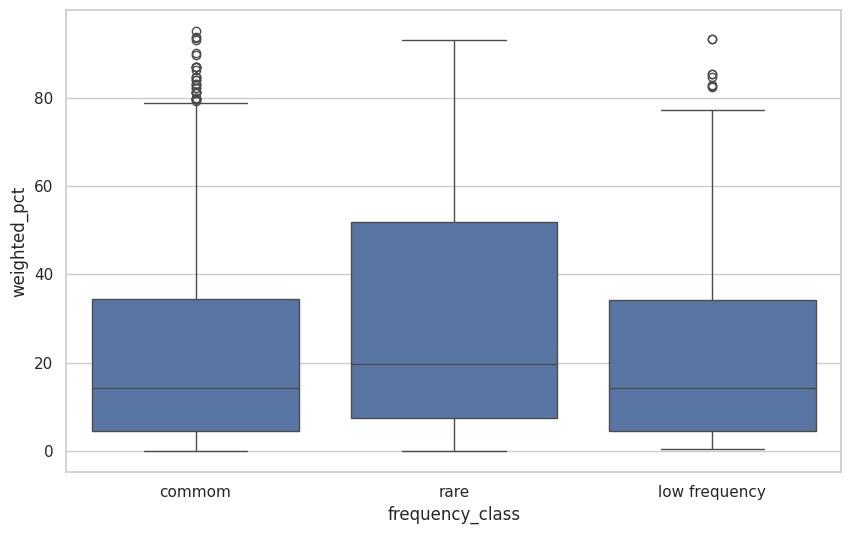

In [ ]:
# CCRspct by secondary allele frequency
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=final_df,
    x='frequency_class',
    y='weighted_pct'
)

In [ ]:
# ANOVA AF
groups_af = [group_af['weighted_pct'].values for name_af, group_af in final_df.groupby('frequency_class')]
f_stat_af, p_val_af = stats.f_oneway(*groups_af)


print(f"F-statistic: {f_stat_af:.2f}")
print(f"p-value: {p_val_af:.4f}")

F-statistic: 8.89
p-value: 0.0001


In [ ]:
unique_groups = final_df['frequency_class'].unique()

pairs = list(itertools.combinations(unique_groups, 2))

p_values = []
pair_labels = []

for g1, g2 in pairs:
    group1_data = final_df[final_df['frequency_class'] == g1]['weighted_pct']
    group2_data = final_df[final_df['frequency_class'] == g2]['weighted_pct']

    t_stat, p_val = stats.ttest_ind(group1_data, group2_data, equal_var=False)

    p_values.append(p_val)
    pair_labels.append(f"{g1} vs {g2}")


reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

results_bonferroni = pd.DataFrame({
    'Pair': pair_labels,
    'Original p-value': p_values,
    'Corrected p-value': pvals_corrected,
    'Significant Diff?': reject
})

print("--- Pairwise T-tests with Bonferroni Correction ---")
print(results_bonferroni)

--- Pairwise T-tests with Bonferroni Correction ---
                      Pair  Original p-value  Corrected p-value  \
0           commom vs rare          0.000225           0.000674   
1  commom vs low frequency          0.883709           1.000000   
2    rare vs low frequency          0.002230           0.006689   

   Significant Diff?  
0               True  
1              False  
2               True  


In [ ]:
len(final_df[final_df["weighted_pct"] > 80])

47

In [ ]:
final_df[final_df["weighted_pct"] > 80]["AF NFE"].mean()

np.float64(0.18907328371558962)

In [ ]:
final_df["AF NFE"].mean()

np.float64(0.26234422849362843)

In [ ]:
final_df[(final_df["weighted_pct"] > 80) & (final_df['frequency_class'] == 'low frequency')].sort_values(by="weighted_pct", ascending=False)

,Variant ID,CSQ,HGVSc,HGVSp,P-Value,Beta,AC NFE,AN NFE,AF NFE,ensp,...,chain,residue,AA,SS,ACC,max_acc,rsa,ss_3class,burial_status,frequency_class
1961,18-49583585-A-G,missense_variant,ENST00000261292.9:c.1187A>G,ENSP00000261292.4:p.Asn396Ser,1.263413e-14,0.073852,9942,735890,0.013510,ENSP00000261292.4,...,A,396,N,E,18,195.0,0.092308,B,Buried,low frequency
1601,18-49583585-A-G,missense_variant,ENST00000261292.9:c.1187A>G,ENSP00000261292.4:p.Asn396Ser,2.073196e-213,0.284172,9942,735890,0.013510,ENSP00000261292.4,...,A,396,N,E,18,195.0,0.092308,B,Buried,low frequency
234,1-51408295-G-A,missense_variant,ENST00000371733.8:c.1313C>T,ENSP00000360798.3:p.Ser438Leu,4.647892e-18,0.043091,16580,734134,0.022584,ENSP00000360798.3,...,A,438,S,H,75,155.0,0.483871,H,Exposed,low frequency
1122,1-51408295-G-A,missense_variant,ENST00000371733.8:c.1313C>T,ENSP00000360798.3:p.Ser438Leu,1.076696e-14,0.056106,16580,734134,0.022584,ENSP00000360798.3,...,A,438,S,H,75,155.0,0.483871,H,Exposed,low frequency
329,17-48799701-G-A,missense_variant,ENST00000393382.7:c.671C>T,ENSP00000377043.3:p.Pro224Leu,4.976767e-11,0.026128,26396,735828,0.035873,ENSP00000377043.3,...,A,224,P,-,37,159.0,0.232704,C,Buried,low frequency
1476,19-4361659-C-T,missense_variant,ENST00000269886.7:c.1048G>A,ENSP00000269886.2:p.Gly350Ser,5.242305e-13,0.059133,12463,735834,0.016937,ENSP00000269886.2,...,A,350,G,T,66,104.0,0.634615,C,Exposed,low frequency
1828,18-49792256-T-C,missense_variant,ENST00000285093.15:c.649A>G,ENSP00000285093.8:p.Met217Val,2.655341e-09,0.052790,10507,735848,0.014279,ENSP00000285093.8,...,A,217,M,E,10,224.0,0.044643,B,Buried,low frequency
1260,3-142562456-C-T,missense_variant,ENST00000350721.9:c.946G>A,ENSP00000343741.4:p.Val316Ile,7.218926e-16,-0.060770,14633,735880,0.019885,ENSP00000343741.4,...,A,316,V,H,90,174.0,0.517241,H,Exposed,low frequency


In [ ]:
final_df[(final_df["weighted_pct"] > 80) & (final_df['frequency_class'] == 'low frequency')].sort_values(by="weighted_pct", ascending=False).iloc[-2].to_dict()

{'Variant ID': '18-49792256-T-C',
 'CSQ': 'missense_variant',
 'HGVSc': 'ENST00000285093.15:c.649A>G',
 'HGVSp': 'ENSP00000285093.8:p.Met217Val',
 'P-Value': 2.65534131851292e-09,
 'Beta': 0.0527901543992995,
 'AC NFE': 10507,
 'AN NFE': 735848,
 'AF NFE': 0.0142787640925843,
 'ensp': 'ENSP00000285093.8',
 'symbol': 'ACAA2',
 'Ensembl_prot': 'ENSP00000285093.8',
 'HGNC_ID': 'HGNC:83',
 'genomic_pos': 49792256,
 'chrom': '18',
 'gene': 'ACAA2',
 'transcript': 'ENST00000285093',
 'exon': '6/10',
 'c_start': 49792256,
 'c_end': 49792287,
 'weighted_pct': 82.510261969,
 'ranges': '49792256-49792287',
 'varflag': 'VARFALSE',
 'status': 'variant within',
 'trait': 'HDL cholesterol',
 'aa_pos': 217,
 'uniprot_id': 'P42765',
 'Reviewed': 'reviewed',
 'Entry Name': 'THIM_HUMAN',
 'Protein names': '3-ketoacyl-CoA thiolase, mitochondrial (EC 2.3.1.16) (Acetyl-CoA acetyltransferase) (EC 2.3.1.9) (Acetyl-CoA acyltransferase) (Acyl-CoA hydrolase, mitochondrial) (EC 3.1.2.-, EC 3.1.2.1, EC 3.1.2.2) (

In [ ]:
final_df[final_df["weighted_pct"] > 80].sort_values(by="weighted_pct", ascending=False)[3:5].to_dict()

{'Variant ID': {1601: '18-49583585-A-G', 1961: '18-49583585-A-G'},
 'CSQ': {1601: 'missense_variant', 1961: 'missense_variant'},
 'HGVSc': {1601: 'ENST00000261292.9:c.1187A>G',
  1961: 'ENST00000261292.9:c.1187A>G'},
 'HGVSp': {1601: 'ENSP00000261292.4:p.Asn396Ser',
  1961: 'ENSP00000261292.4:p.Asn396Ser'},
 'P-Value': {1601: 2.07319643519234e-213, 1961: 1.26341269237737e-14},
 'Beta': {1601: 0.284172166904636, 1961: 0.0738523524932983},
 'AC NFE': {1601: 9942, 1961: 9942},
 'AN NFE': {1601: 735890, 1961: 735890},
 'AF NFE': {1601: 0.0135101713571321, 1961: 0.0135101713571321},
 'ensp': {1601: 'ENSP00000261292.4', 1961: 'ENSP00000261292.4'},
 'symbol': {1601: 'LIPG', 1961: 'LIPG'},
 'Ensembl_prot': {1601: 'ENSP00000261292.4', 1961: 'ENSP00000261292.4'},
 'HGNC_ID': {1601: 'HGNC:6623', 1961: 'HGNC:6623'},
 'genomic_pos': {1601: 49583585, 1961: 49583585},
 'chrom': {1601: '18', 1961: '18'},
 'gene': {1601: 'LIPG', 1961: 'LIPG'},
 'transcript': {1601: 'ENST00000261292', 1961: 'ENST0000026